In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

## Informacje o danych
• Pclass – klasa | (1 = pierwsza; 2 = druga; 3 = trzecia)
• Age – wiek pasażera,
• Sex – płeć pasażera,
• Sibsp – liczba małżonków, lub rodzeństwa na pokładzie,
• Parch – liczba rodziców, lub dzieci na pokładzie,
• Ticket – numer biletu,
• Fare – opłata za bilet,
• Cabin – kabina,
• Embarked – port startowy (C = Cherbourg; Q = Queenstown; S = Southampton).

In [2]:
dataset = pd.read_csv("titanic.csv", sep=',')
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
dataset.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset.shape

(1309, 14)

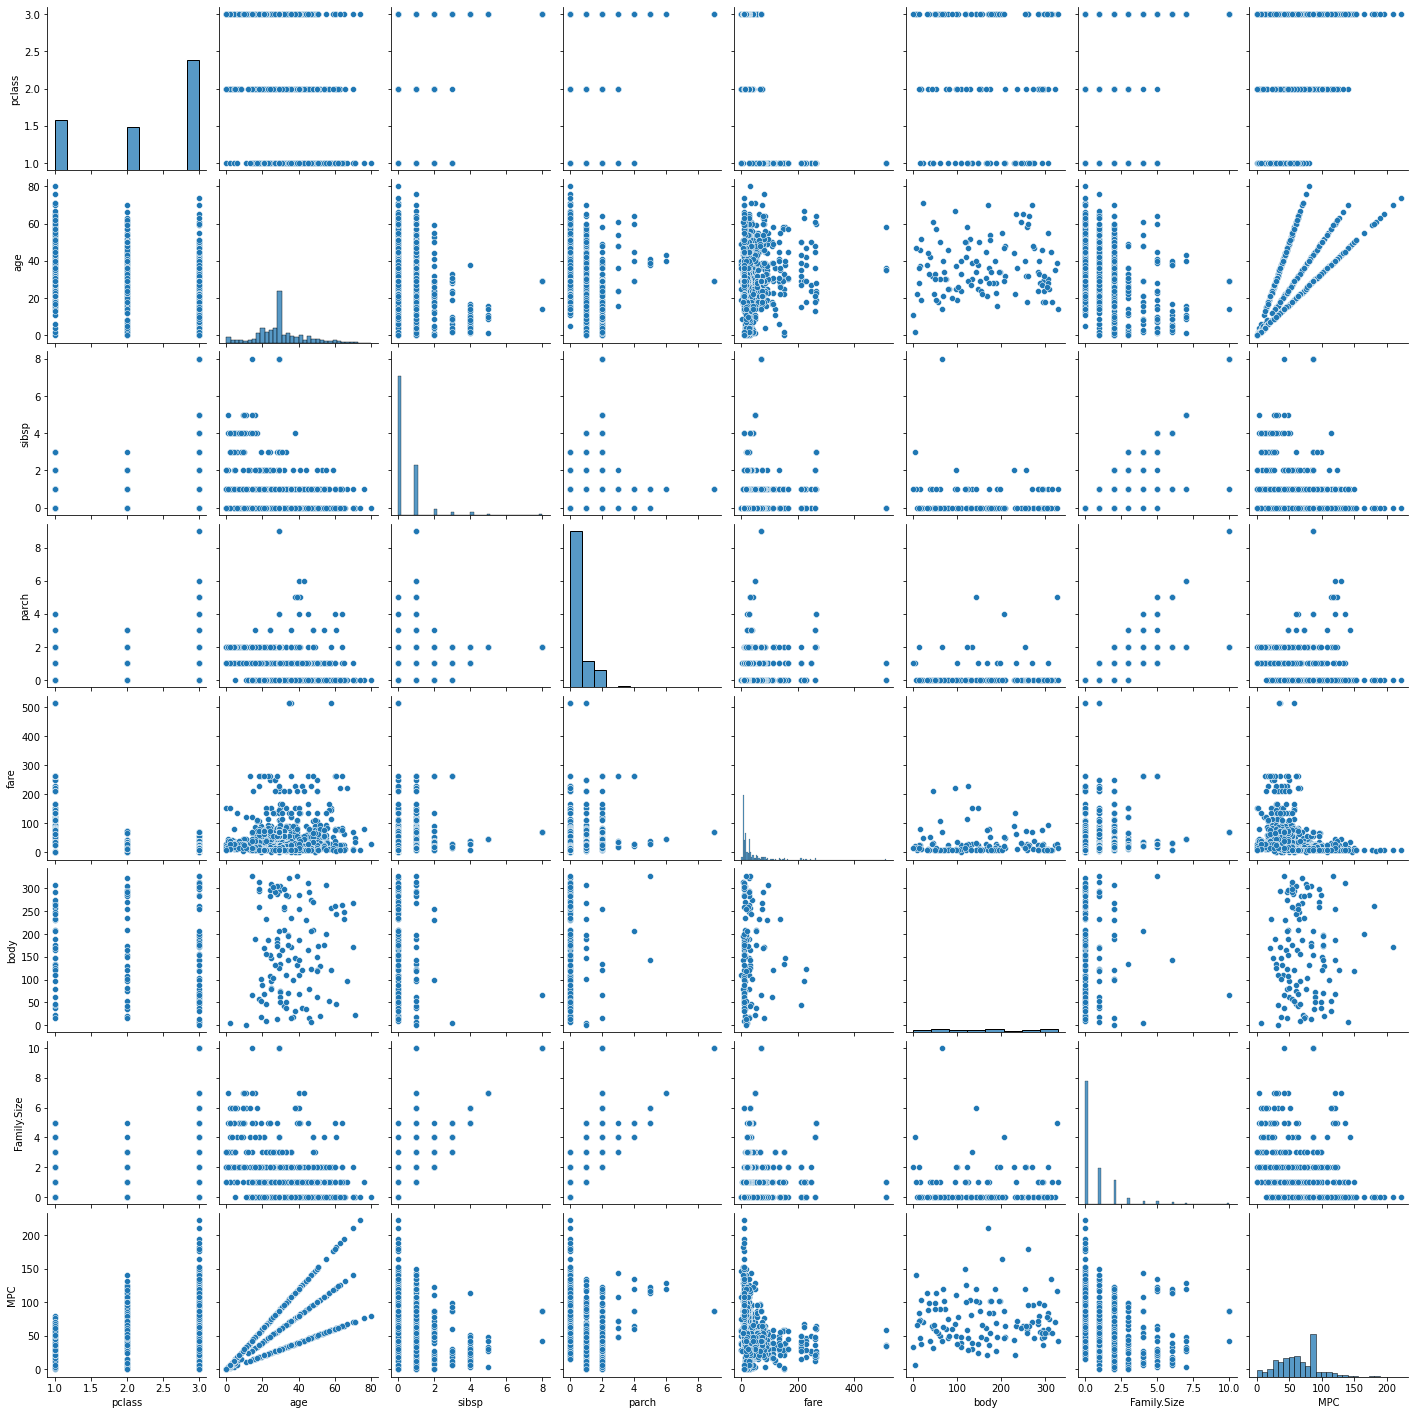

In [18]:
sns.pairplot(dataset.loc[:, dataset.columns != 'survived'])

In [6]:
dataset["Family.Size"] = dataset["parch"] + dataset["sibsp"]
dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Family.Size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0


## Czyszczenie danych
Uzupełnienie danych z kolumny 'age' średnią wartością

In [7]:
dataset.columns
#dataset = dataset.fillna(subset=['age'])
avg = dataset['age'].mean()
dataset['age'] = dataset['age'].fillna(avg)
dataset.shape

(1309, 15)

In [8]:
dataset['age'] = dataset['age'].astype(int)
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Family.Size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3


In [9]:
dataset['Age.Range'] = np.where((dataset['age'] >= 0) & (dataset['age'] < 6) , "Bobas", np.where((dataset['age'] >= 6) & (dataset['age'] < 12) , "Dzieciak", np.where((dataset['age'] >= 12) & (dataset['age'] < 18) , "Nastolatek", "Dorosły")))

dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Family.Size,Age.Range
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,Dorosły
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,Bobas
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,Bobas
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,Dorosły
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,Dorosły


In [10]:
dataset['MPC'] = dataset['age']*dataset['pclass']
dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Family.Size,Age.Range,MPC
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,Dorosły,29
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,Bobas,0
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,Bobas,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,Dorosły,30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,Dorosły,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,Nastolatek,42
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,Dorosły,87
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,Dorosły,78
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,Dorosły,81


In [16]:
dataset.drop('name')

KeyError: "['name'] not found in axis"

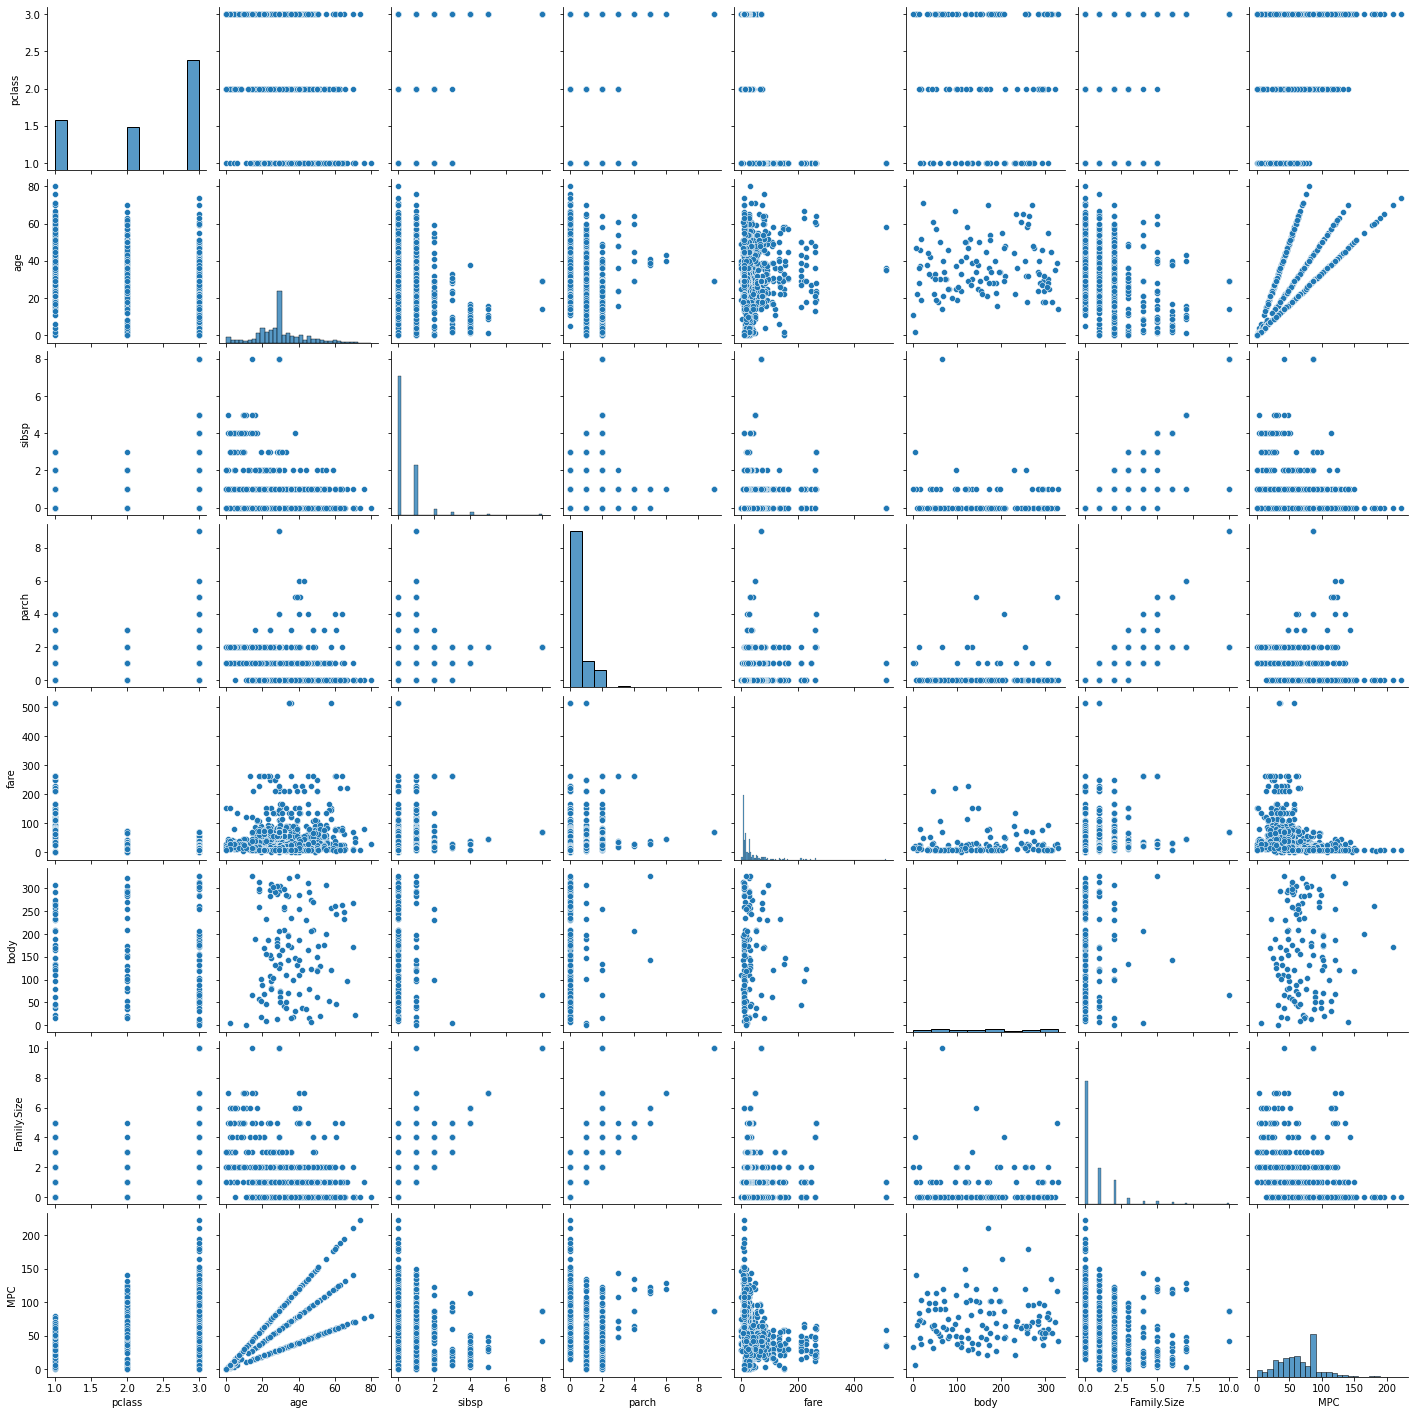

In [12]:
X = dataset.loc[:, dataset.columns != 'survived']
Y = dataset['survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)

In [14]:
from sklearn.cluster import KMeans
model = KMeans(init="random", n_clusters=2, n_init=15, max_iter=500, random_state=100)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
matrix = confusion_matrix(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)

algorithms["KMeans"] = accuracy

ValueError: could not convert string to float: 'Elias, Mr. Joseph'